# noisyduck

## Tutorial 1: Uniform Axial Flow in a Cylindrical Annulus

Here we use **noisyduck** to analyze the case of uniform axial flow in a cylindrical annulus. This is a nice case because analytical acoustic eigenvalues and eigenvectors can be computed and used as a reference comparison for the numerical decomposition.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import noisyduck as nd

Here, we will define the mean flow state and the annulus geometry that will be used to perform the decomposition.

In [4]:
gam=1.4; rho=1.2; vr=0.; vt=0.; vz=100.; p=100000.
ri=0.25; ro=1.0; res=50
r = np.linspace(ri,ro,res)
omega=3000.; m=2

Now, we pass the state and radial discretization to the numerical decomposition routine. This returns eigenvalues and left/right eigenvectors. We run the decomposition here twice, once without filtering and once with filtering so the spectra of the original decomposition can be compared against the filtered decomposition later.

In [24]:
evals_r, evecs_rl, evecs_rr = nd.annulus.numerical.decomposition(omega,m,r,rho,vr,vt,vz,p,gam,filter='None',perturb_omega=True)
evals_f, evecs_fl, evecs_fr = nd.annulus.numerical.decomposition(omega,m,r,rho,vr,vt,vz,p,gam,filter='acoustic',alpha=0.00001,perturb_omega=True)

rho_evecs = evecs_fr[0*res:1*res,:]
vr_evecs  = evecs_fr[1*res:2*res,:]
vt_evecs  = evecs_fr[2*res:3*res,:]
vz_evecs  = evecs_fr[3*res:4*res,:]
p_evecs   = evecs_fr[4*res:5*res,:]

Now, we want to compute the analytical eigendecomposition of the annular duct.

In [8]:
c = np.sqrt(gam*p/rho)
mach = vz/c
omega = omega/c
n = len(evals_f)

evals_a, evecs_a = nd.annulus.analytical.decomposition(omega,m,mach,r,n)

At this point, both the numerical and analytical decompositions have been computed so we will plot their eigenvalues and eigenvectors as a comparison. First, the *raw* unfiltered eigenspectrum from the numerical decomposition is plotted.

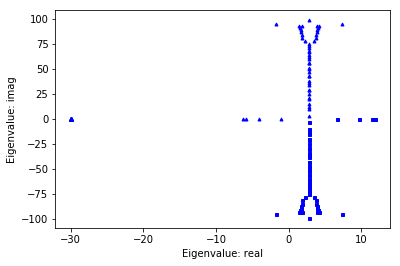

In [20]:
fig = plt.figure()
for i in range(len(evals_r)):
    if (evals_r[i].imag > 0.):
        plt.plot(evals_r[i].real,evals_r[i].imag, 'b^',markersize=3)
    elif (evals_r[i].imag < 0.):
        plt.plot(evals_r[i].real,evals_r[i].imag, 'bs',markersize=3)
l = plt.xlabel('Eigenvalue: real')
l = plt.ylabel('Eigenvalue: imag')

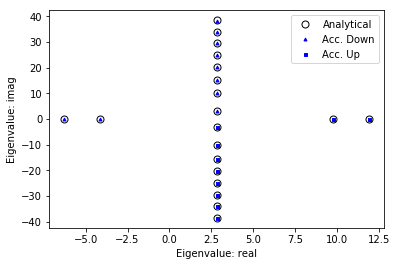

In [23]:
for i in range(len(evals_f)):
    if (evals_f[i].imag > 0.):
        h_up, = plt.plot(evals_f[i].real,evals_f[i].imag, 'b^',markersize=3, label='Acc. Down')
    elif (evals_f[i].imag < 0.):
        h_down, = plt.plot(evals_f[i].real,evals_f[i].imag, 'bs',markersize=3, label='Acc. Up')
h_analytical, = plt.plot(evals_a.real,evals_a.imag, 'ko', markerfacecolor='None',markersize=7,label='Analytical')
l = plt.xlabel('Eigenvalue: real')
l = plt.ylabel('Eigenvalue: imag')
l = plt.legend(handles=[h_analytical,h_up,h_down],numpoints=1)

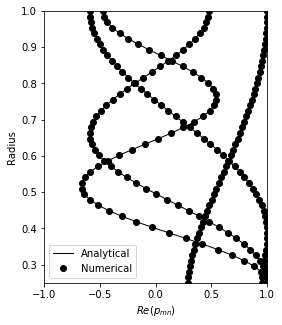

In [40]:
fig = plt.figure(figsize=(4,5))
for i in range(4):
    h_va, = plt.plot(evecs_a[:,2*i],r, 'k', linewidth=1, label='Analytical')
    h_vn, = plt.plot(p_evecs[:,2*i].real/np.max(np.abs(p_evecs[:,2*i].real)),r, 'ko', label='Numerical')
l=plt.legend(handles=[h_va,h_vn],numpoints=1,loc=0)
l=plt.xlim((-1,1))
l=plt.ylim((0.25,1.0))
l=plt.xlabel('$Re(p_{mn})$')
l=plt.ylabel('Radius')